# Обрада и приказ табеларних података

Обраду, анализу и графички приказ података је тешко раздвојити. Све то углавном иде паралелно. У Пајтону постоји неколико најчешће коришћених библиотека које су усаглашене тако да објекти које користимо за обраду података имају функције за цртање, а функције за цртање враћају табеле и серије. Зато је то овде једна лекција.

## Обрада табеларних података

Много тога за шта су нам потребни програмерско знање и труд при обради података у листама постаје једноставна примена готових функција када податке спакујемо у _DataFrame_. Библиотека _pandas_ омогућава да рад са табелама буде једноставан, брз и ефикасан. 

### Учитавање табеле из датотеке

Податке најчешће чувамо у табелама. Чак су и базе података само колекције различитих табела. За поновну употребу табеле снимамо у датотеке (или фајлове, како их понекад зовемо). Те снимљене табеле касније учитавамо по потреби. Уобичајени формат датотека за снимање табела је CSV (енгл. _comma separated value_, тј. вредности одвојене зарезом). Библиотека _pandas_ има функције за учитавање и снимање табела. За учитавање користимо функцију `pd.read_csv()`. Aргумент ове функције је стринг са локацијом и називом датотеке, нпр. "podaci/countries.csv". Ова датотека се не налази у Пајтоновом радном директоријуму већ у поддиректоријуму _data_, због чега је потребно да то напишемо и да назив директоријума и датотеке раздвојимо косом цртом. Учитаћемо сада баш ту датотеку.  

In [1]:
import pandas as pd                # prvo uvozimo pandas biblioteku
import matplotlib.pyplot as plt    # i biblioteku za crtanje grafika

In [2]:
dt = pd.read_csv('podaci/countries.csv')

При позивању функција из одређене библиотеке потребно је да наведемо ознаке библиотека. Зато није довољно да напишемо `read_csv()` већ морамо `pd.read_csv()`. При увожењу библиотека ми смо нагласили да ћемо користити скраћена имена уместо пуних. Користићемо `pd` уместо `pandas` и `plt` уместо `matplotlib.pyplot` што ће нам олакшати писање кôда.

Садржај датотеке смо учитали и сместили у табелу (тачније променљиву типа _dataframe_) `dt`. Да бисмо видели шта је учитано, згодно је да прикажемо на екрану заглавље те табеле са првих неколико редова. За то нам служи функција `.head()`.

In [3]:
dt.head()

,Country,Continent,Population,Area
0,Afghanistan,Asia,31056997,647500
1,Albania,Europe,3581655,28748
2,Algeria,Africa,32930091,2381740
3,American Samoa,Oceania,57794,199
4,Andorra,Europe,71201,468


У колони без имена на почетку са леве стране, тј. индексној колони стоје бројеви од 0 до _n_-1, при чему је _n_ број редова у табели. Свака табела мора да има индексну колону. То не морају да буду редни бројеви, али ако при учитавању табеле ништа не нагласимо, Пајтон ће сам да је направи. Индексна колона служи да се по њој позивају елементи. Елементи табеле су редови у табели. Тако је `dt[2]` ред у ком су подаци за Алжир. Свака колона у којој нема понављања вредности може да буде индексна, али се овде нећемо на томе задржавати.

Видимо да су државе наведене по редовима, а да по колонама имамо основне податке о тим државама. У колони _Country_ је име државе, _Continent_ означава континент на ком се налази, _Population_ број становника, а _Area_ површину државе у квадратним километрима. Називе свих колона можемо да добијемо помоћу `dt.columns`.

In [4]:
dt.columns

Index(['Country', 'Continent', 'Population', 'Area'], dtype='object')

Вредности које се налазе у одређеној колони се позивају тако што после имена табеле у угластим заграда наведемо име колоне под једноструким или двоструким наводницима. Да бисмо приказали колону са именима држава, написаћемо `dt['Country']` или `dt["Country"]`.

In [5]:
dt['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
222         West Bank
223    Western Sahara
224             Yemen
225            Zambia
226          Zimbabwe
Name: Country, Length: 227, dtype: object

Ако хоћете да видите само део ове листе, користите _слајсове_. Са `[:10]` ћете нпр. добити првих 10, а са `[10:20]` других 10 елемената колоне.

In [6]:
dt['Country'][10:20]

10           Aruba
11       Australia
12         Austria
13      Azerbaijan
14    Bahamas, The
15         Bahrain
16      Bangladesh
17        Barbados
18         Belarus
19         Belgium
Name: Country, dtype: object

### Додавање нових колона

Табеле могу да се мењају, да се табели додају и бришу колоне и врсте, као и да се мењају вредности које су већ у табели. Ако бисмо хтели да додамо колону у којој ће бити густина насељености, треба само да израчунамо тражене вредности и ставимо их у посебну колону. Довољно је да, још увек непостојећој, колони са новим именом, нпр. _Density_, придружимо резултат тог израчунавања.

In [7]:
dt['Density']=dt['Population']/dt['Area']

>Напомена: Приметите како једноставно можемо да поделимо све вредности једне колоне са одговарајућим вредностима друге колоне. То са листама не можемо да радимо, али ако користимо _pandas_ табеле, онда ће колоне те табеле бити променљиве типа _Series_. За серије су основне математичке операције дефинисане тако да операције вршимо за сваки елемент једне серије са одговарајућим елементом из друге. Некад је згодно листе претворити у серије како бисмо могли да рачунамо на овај начин. То би изгледало отприлике овако: 
>
>```
lista=[1,2,3]
serija=pd.Series(lista)
serija_na_kvadrat=serija*serija
```

Нова колона са именом _Density_ је аутоматски додата чим смо је израчунали. Можемо да погледамо како изгледа заглавље табеле и тако проверимо да ли је нова колона додата како треба.

In [8]:
dt.head()

,Country,Continent,Population,Area,Density
0,Afghanistan,Asia,31056997,647500,47.964474
1,Albania,Europe,3581655,28748,124.587971
2,Algeria,Africa,32930091,2381740,13.826065
3,American Samoa,Oceania,57794,199,290.422111
4,Andorra,Europe,71201,468,152.138889


### Сортирање

Библиотека _pandas_ има прегршт корисних функција за рад са табелама и њиховим колонама. Функција `.sort_values()` сортира све вредности у одређеној колони и прерасподељује садржај осталих колона у складу са тим. Ако хоћемо да видимо које то државе имају најмању и највећу густину насељености, можемо да сортирамо вредности по тој колони и погледамо које се државе налази на почетку и крају табеле.  

In [9]:
dt.sort_values('Density')

,Country,Continent,Population,Area,Density
80,Greenland,North America,56361,2166086,0.026020
223,Western Sahara,Africa,273008,266000,1.026346
139,Mongolia,Asia,2832224,1564116,1.810751
70,French Guiana,South America,199509,91000,2.192407
143,Namibia,Africa,2044147,825418,2.476499
...,...,...,...,...,...
78,Gibraltar,Europe,27928,7,3989.714286
91,Hong Kong,Asia,6940432,1092,6355.706960
184,Singapore,Asia,4492150,693,6482.178932
122,Macau,Asia,453125,28,16183.035714


Табеле са великим бројем редова нису прегледне чак ни када их сортирамо. Зато је пожељно да направимо графички приказ који би нам помогао у тумачењу података. Овде ћемо дати примере два типа дијаграма (стубичасти дијаграм и хистограм) за приказ колоне са густином насељености и површином држава. 

Прво дајемо стубичасти дијаграм. Аргументи функције су ознаке стубића (име државе) и дужина стубића (густина насељености). Пошто држава у табели има преко 200, тешко је направити прегледан график са свим државама. Зато смо узели само двадесет држава са највећом густином насељености. Због прегледности исписа згодније нам је да стубићи буду хоризонтални. Зато користимо функцију `.barh()` уместо `.bar()`. Пробајте и са `.bar()` да видите како би изгледало.

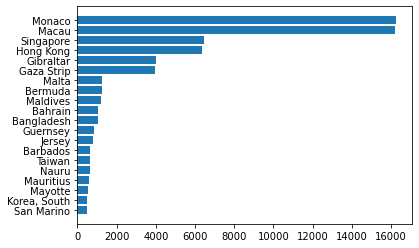

In [10]:
spd=dt.sort_values('Density')                # sortiramo tabelu po gustini naseljenosti i dodeljujemo je novoj tabeli
spd20=spd[-20:]                              # zbog preglednosti, pomoću slajsa, izdvajamo samo poslednjih 20 redova
plt.barh(spd20['Country'],spd20['Density']); # crtamo horizontalni stubičasti dijagram 

Други важан графикон за приказ расподеле података је хистограм. Он нам даје приказ броја држава по одређеним интервалима вредности за површину држава. Функција `.hist()` дели интервал од најмање до највеће вредности на десет једнаких под-интервала уколико не наведемо конкретан број као други аргумент функције. У овом примеру распон од 0 до 20 милиона km² (што задајемо са `range=(0,2e7)`) делимо на 20 једнаких интервала и пребројавамо колико држава има у сваком од њих. У првом интервалу, од 0 до 100 000 квадратних килoмeтара, има скоро 200 држава. И Србија је међу њима. Ретке су оне које имају површину већу од 300 000 km².

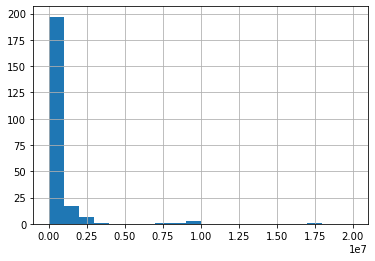

In [11]:
plt.hist(spd['Area'],20,range=(0,2e7))
plt.grid()                               # crtanje mreže na grafikonu

### Филтрирање табеле

Филтрирање значи да од целе табеле желимо да издвојимо само оне редове који нас интересују. За филтрирање података у табели користимо критеријуме, односно логичке исказе као што је нпр. `dt['Continent']=="North America"`. Овде проверавамо које су вредности у колони `dt['Continent']` једнаке стрингу `"North America"`. У угласте заграде после назива табеле треба унети тражени критеријум. На тај начин од целе почетне табеле издвајамо само онај део табеле где је критеријум испуњен.

На пример, овако можемо да издвојимо само државе које се налазе у Северној Америци.

In [12]:
dt[dt['Continent']=="North America"]

,Country,Continent,Population,Area,Density
22,Bermuda,North America,65773,53,1241.000000
36,Canada,North America,33098932,9984670,3.314975
80,Greenland,North America,56361,2166086,0.026020
174,St Pierre & Miquelon,North America,7026,242,29.033058
214,United States,North America,298444215,9631420,30.986523


Слично можемо да издвојимо све државе са мање од 20000 становника. Шта мислите колико их има?

In [13]:
dt[dt['Population']<20000]

,Country,Continent,Population,Area,Density
6,Anguilla,South America,13477,102,132.127451
140,Montserrat,South America,9439,102,92.539216
144,Nauru,Oceania,13287,21,632.714286
171,Saint Helena,Africa,7502,413,18.164649
174,St Pierre & Miquelon,North America,7026,242,29.033058
209,Tuvalu,Oceania,11810,26,454.230769
221,Wallis and Futuna,Oceania,16025,274,58.485401


__Задатак 1__: Испишите податаке из табеле `dt` за европске земље са више од 20 милиона становника.

### Записивање табеле у датотеку

Измењену табелу, за почетак, имамо само у меморији рачунара. Ако хоћемо да сачувамо те измене, потребно је да снимимо табелу у датотеку. Функција коју користимо за ту намену је `.to_csv()`. Аргумент функције је назив датотеке у коју ћемо да снимимо табелу.

In [14]:
dt.to_csv('podaci/countries2.csv')

## Статистички и графички приказ табеларних података

Статистичко и графичко приказивање података тешко је раздвојити. Велики број података, без обзира да ли их је 20 или 20 милијарди, приказујемо у сведеном облику користећи мањи број карактеристичних вредности или графички приказ расподела и вредности података. Не постоји "најбољи начин" за приказивање података. Избор начина приказа зависи од природе податка. Морамо да их познајемо да бисмо знали шта да ставимо у први план. Почећемо са једноставнијим примерима – са низовима података.

### Колоне са номиналним подацима

У табели типа _dataframe_ можемо да имамо различите типове података. Битно је само да су у једној колони сви подаци истог типа. Два најважнија типа података, заправо групе типова су номинални (или категоријални) и нумерички подаци. Номинални подаци означавају нека имена, називе или кратке текстуалне описе. Имена држава представљају номиналне податке. Чак и када се означавају бројем (нпр. број зграде у улици), ти подаци остају номинални. Са тим бројевима се ништа не рачуна. Већина номиналних података су стрингови који означавају различите објекте. Једина статистика коју можемо да радимо са номиналним подацима јесте да пребројимо колико их има, тј. да видимо колико се често појављују.

У табели `dt` имамо колону са именом континента на ком се држава налази. Ако бисмо пребројали колико се пута појављују ови подаци, видели бисмо колико држава имамо на ком континенту. Библиотека _pandas_ нам омогућава да то радимо помоћу функције `.value_counts()` коју применимо на одговарајућу колону.

In [15]:
vc=dt['Continent'].value_counts()
print(vc)

Africa           57
Asia             52
Europe           47
South America    45
Oceania          21
North America     5
Name: Continent, dtype: int64


Видимо да је резултат функције `.value_counts()` серија у којој су наведени континенти са бројем држава које тај континент има. Серије су у суштини табеле са само једном колоном. Као што табеле осим регуларних колона имају и индексну колону у којој су имена редова, тако и серије имају низ са вредностима и индексни низ у ком су имена редова, тј. елемената у серији. Конкретно, серија `vc` има низ са вредностима `vc.values` (број држава на континенту) и индексни низ `vc.index` (име континента).

In [16]:
vc.values

array([57, 52, 47, 45, 21,  5], dtype=int64)

In [17]:
vc.index

Index(['Africa', 'Asia', 'Europe', 'South America', 'Oceania',
       'North America'],
      dtype='object')

### Колоне са нумеричким подацима

Бројеви могу да се пореде међусобно по величини. Са бројевима могу да се раде и рачунске операције. Због тога су могућности за обраду и анализу нумеричких низова много веће него за номиналне. Наш основни задатак је да цео низ података што једноставније и разумљивије представимо. Низ података често поједностављено приказујемо помоћу карактеристичних вредности, као што је нпр. средња вредност. Други важан начин је да цео низ података прикажемо графички како бисмо податке могли да "видимо".  

### Описивање низова података преко карактеристичних вредности

Шта је просек? Просек није дефинисан као посебна математичка функција. Просек је било која вредност (као што су средња вредност, мод или медијана) која се узима за карактеристичну вредност једног скупа различитих података. Кад се каже просек, најчешће се мисли на средњу вредност (аритметичку средину), али просек може да буде и медијана или мод. Врло је важно да се нагласи шта подразумевамо под просеком. Конкретно, просек оцена у школи је њихова аритметичка средина.

За рачунање средње вредности се користи _pandas_ функција `.mean()` која се примењује на нумеричку колону у табели. Користећи табелу са подацима о државама израчунаћемо средњу вредност површина држава.

In [18]:
dt['Area'].mean()

598226.9559471365

Средња вредност површина свих држава је приближно 598 000 km². Толика би била површина сваке појединачне државе на свету када би територија била равномерно распоређена. Ми, међутим, знамо да постоје минијатурне државе са по неколико квадратних километра, док са друге стране имамо Русију са 17 милиона km². Шта нам говори средња вредност? Да ли је површина типичне државе на овој планети?

Ако погледамо хистограм површине држава, видећемо да је највише малих држава, а да су врло ретке оне са више милиона km². Држава са површином 598 000 km² би била заста велика. Не рачунајући Русију, само би Украјина од европских држава имала већу површину. То свакако не би била типична држава. Од ње би 45 држава биле веће, док би чак 182 биле мање. Боља мера за типичну површину државе би била да има подједнак број држава које имају већу и држава које имају мању површину. Пошто имамо 227 држава, она која се налази на 114 месту по површини одговара том критеријуму.

Да бисмо видели која је 114 држава по површини, сортираћемо табелу `dt` тако да не буде у растућем већ у опадајућем редоследу (`acdending=False`) и тако да занемари старе индексе и постави нове према (`ignore_index=True`). Онда ћемо помоћу _слајса_ приказати редове од 112 до 114, који због тога што први ред има индекс 0, одговарају државама са 113, 114. и 115. највећом површином.

In [19]:
sdt=dt.sort_values('Area',ascending=False,ignore_index=True) # sortiramo u opadajućem resoledu
sdt[112:115] # izdavajamo redove 112, 113 i 114 pomoću slajsa

,Country,Continent,Population,Area,Density
112,Serbia,Europe,9396411,88361,106.341157
113,Azerbaijan,Asia,7961619,86600,91.935554
114,Austria,Europe,8192880,83870,97.685466


Површина типичне државе је 86 600 km² колика је површина Азербејџана. Исту ову вредност смо могли да добијемо помоћу функције `.median()`.

In [20]:
dt['Area'].median()

86600.0

__Медијана__ је математичка функција која нам даје средишњу вредност за низ који је сортиран по величини. Она дели низ на два дела са истим бројем елемената. Ако низ, на пример, садржи висине 101 ученика, медијана нам даје висину 51. највишег ученика. Од њега има 50 виших и 50 нижих, док је он у самој средини. Ако имамо паран број ученика, онда нема ученика који је баш у средини па се медијана рачуна мало другачије: као средња вредност висине првог елемента испод и првог изнад те средине. То значи да је медијана низа од 100 бројева, средња вредност 50. и 51. највеће вредности овог низа. 

Трећа помињана мера за карактеристичну вредност је мод. Она говори о томе која се вредност понавља највише пута. Функција која рачуна мод је `.mode()`. Она се, пре свега, примењује за номиналне податке. 

__Задатак 2__: Одредите медијану броја становника за државе света. Да ли за Србију можемо да кажемо да је типична држава и по овом параметру?

Приметите како код школских оцена обе мере: и средња вредност и медијана добро карактеришу цео низ оцена. То је зато што су оцене углавном груписане и немају велике екстреме. Међутим, када поредимо средњу вредност и медијану за низ у ком су неке вредности милион пута веће од неких других, ове две мере дају прилично различите вредности.

In [21]:
niz_ocena=[5,5,3,4,5,4]
serija=pd.Series(niz_ocena)               # lakše je računati kad listu pretvorimo u seriju
print('Средња вредност:', serija.mean())  # onda možemo da primenimo pandas funkcije
print('Медијана:', serija.median())       # .mean() i .median()

Средња вредност: 4.333333333333333
Медијана: 4.5


Екстреме имамо код површине држава и броја становника. Погледајте хистограм држава по површини. Највише је оних малих које видимо као врло висок стубић са леве стране, док су са десне само појединачни случајеви врло ретких великих држава. Не улазећи даље у тумачење података, хоћемо само да покажемо колико средња вредност и медијана могу да се разликују. На графикону доле, црвеном линијом је обележена медијана, а наранџастом средња вредност. Пробајте сами да откријете шта ради која линија у програму.

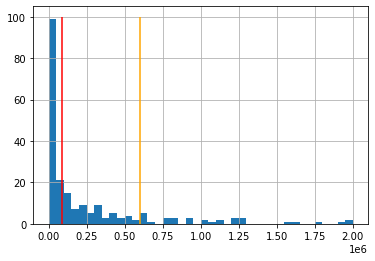

In [22]:
mArea=dt['Area'].mean()
mdArea=dt['Area'].median()
plt.hist(dt['Area'],40,range=(0,2e6))
plt.grid()
plt.vlines(mArea,0,100,colors='orange')
plt.vlines(mdArea,0,100,colors='red');

### Груписање и рачунање статистика за групе

За анализе података по групама користимо функцију `groupby()`. У примеру са државама света, можемо да направимо преглед укупне површине или броја становника груписаних по континентима. Аргумент функције је назив колоне по којој групишемо податке.

In [23]:
bspk=dt.groupby('Continent')

Структура коју добијамо после груписања није _dataframe_ већ сложенији тип податка који није погодан за приказивање на екрану. Када изаберемо податак који групишемо и функцију којом то радимо, онда резултат постаје серија. У примеру који наводимо груписаћемо податке о броју становника тако што ћемо те површине сабрати. За то користимо функцију `.sum()`. Слично бисмо, користећи неке друге функције, могли да нађемо државе са најмањим бројем становника по континентима или средње вредности броја становника.

In [24]:
bspk['Population'].sum()

Continent
Africa            910844133
Asia             3958768088
Europe            727803762
North America     331672307
Oceania            33131662
South America     561824599
Name: Population, dtype: int64

__Задатак 3__: Израчунајте колика је средња густина становништва за сваки континент.